##### Bike Sharing Case Study
##### Author - Ravi Kumar Dhiman

##### Background:
* A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
* Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it.
* This bike can then be returned to another dock belonging to the same system.

##### Company Info
* __Boom Bike__ wants to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
* They want to prepare themselves to cater to the people's needs once the situation gets better all around.
* By doing this, they want to stand out from other service providers and make huge profits.

##### High Level Requirements
* Boom Bikes want to understand the factors affecting the demand for these shared bikes in the American market.
* The company wants to know the following -
    * Significant Variables in Predicting demand of shared bikes
    * How well these significant variables describe the demands of the bike

##### Business Goal (Objectives)
* Create a model to predict the demand for shared bikes with the available independent variables.
* To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
* To know the accuracy of the model i.e. How well those variables describe the bike demands


##### Why is this needed ?
* The model should help understand how the demand vary with features.
* This should then allow the management to meet the demand levels and meet customer's expectations
* This model will also help to understand the demand dynamics of a new market.

##### Technical Details w.r.t. Model Creation
* In the days.csv dataset, the following variables are important -
    * __causal__ : No. of casual users who have made the rental.
    * __registered__ : Total No. of registered users who have made the booking on a given day.
    * __cnt__ : Total no. of bike rentals i.e. both casual and registered. This should be taken as __target variable__

##### Model Evaluation
* After model building, residual analysis, and have mde predictions on the test data, following code must be added to calculate the R-squared on the test set.
    * from sklearn.metrics import r2_score
    * r2_score(y_test, y_pred)
        * y_test: data set for target variable
        * y_pred: list of containing the predicted values of the target on test set

#### Step 1: Reading, understanding and inspecting the Data

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# reading the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
# Checking dataset
df.shape

(730, 16)

In [3]:
# Checking if there is any column which may contain null values
print('Dataframe info: ')
df.info()

Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
print('Dataframe data types: ')
df.dtypes

Dataframe data types: 


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
# Even though the df.info() says the columns have any null value in it
# Identify what % of null values exist in a column
# Formula - cols_missing_data_info = round_to_2_decimal_places((sum of total null values per colum /total_num_records_in_dataframe) * 100)

def checkAndGetNullValuesDataset():
    cols_with_null_values = round(100 * (df.isnull().sum() / len(df)), 2)
    return cols_with_null_values

checkAndGetNullValuesDataset() # confirms the finding that there are no columns with 0 value

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [6]:
# Describing the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#### Checking for duplicate values
df_dup = df.copy()
# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape #has the same shape as original dataset.

(730, 16)

#### Step 1 Results:
* No Missing/Null/Duplicate data found in the dataset

#### Step 2: Data Cleanup/Pre-Processing
Based on the available data and as mentioned in the technical details of the problem, we can easily drop the following columns:
* __instant__ : This column only has index value. We already have default index available so this column is not needed.
* __dteday__ : This is a date column. We already have the month and the Year column separately available we can run analysis without this column.
* __casual__: No. of casual users who have made the rental i.e. bikes booked by casual users. This is automatically covered under the __cnt__ field and since I am looking at total demand, a sub-category is not that important to consider.
* __registered__ : Same as __casual__. __cnt__ is inclusive of this info and can be used on its behalf.

In [8]:
# instant, dteday, casual, registered columns can be directly dropped
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
df1 = df[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
# Using data dictionary, converting feature values of "season" and "weathersit", "yr" columns to their categorical string values

# df1['season'].replace({
#     1: "spring",
#     2: "summer",
#     3: "fall",
#     4: "winter"
# }, inplace=True)
#
# df1['weathersit'].replace({
#     1: "Clear",
#     2: "Misty Or Cloudy",
#     3: "Light Snow/Rain",
#     4: "Heavy Snow/Rain"
# }, inplace=True)
#
# df1['yr'].replace({
#     0: 2018,
#     1: 2019
# }, inplace=True)
#
# df1.head()

### Step 3: Visualising the data

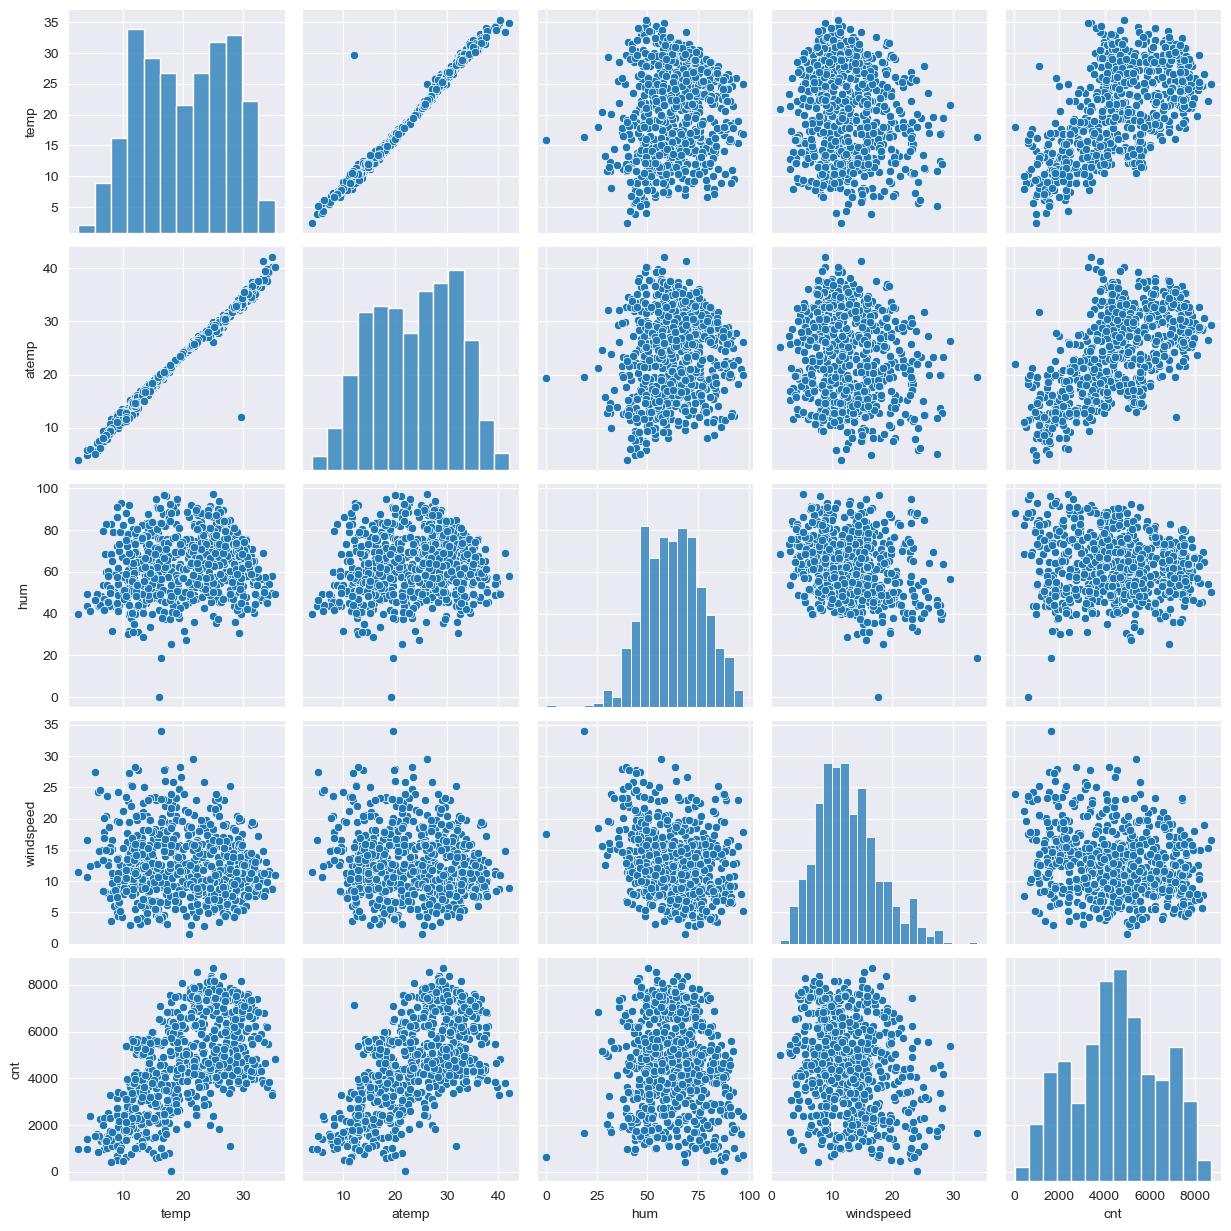

In [13]:
# using pair-plot to understand numeric values

sns.pairplot(data=df1, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

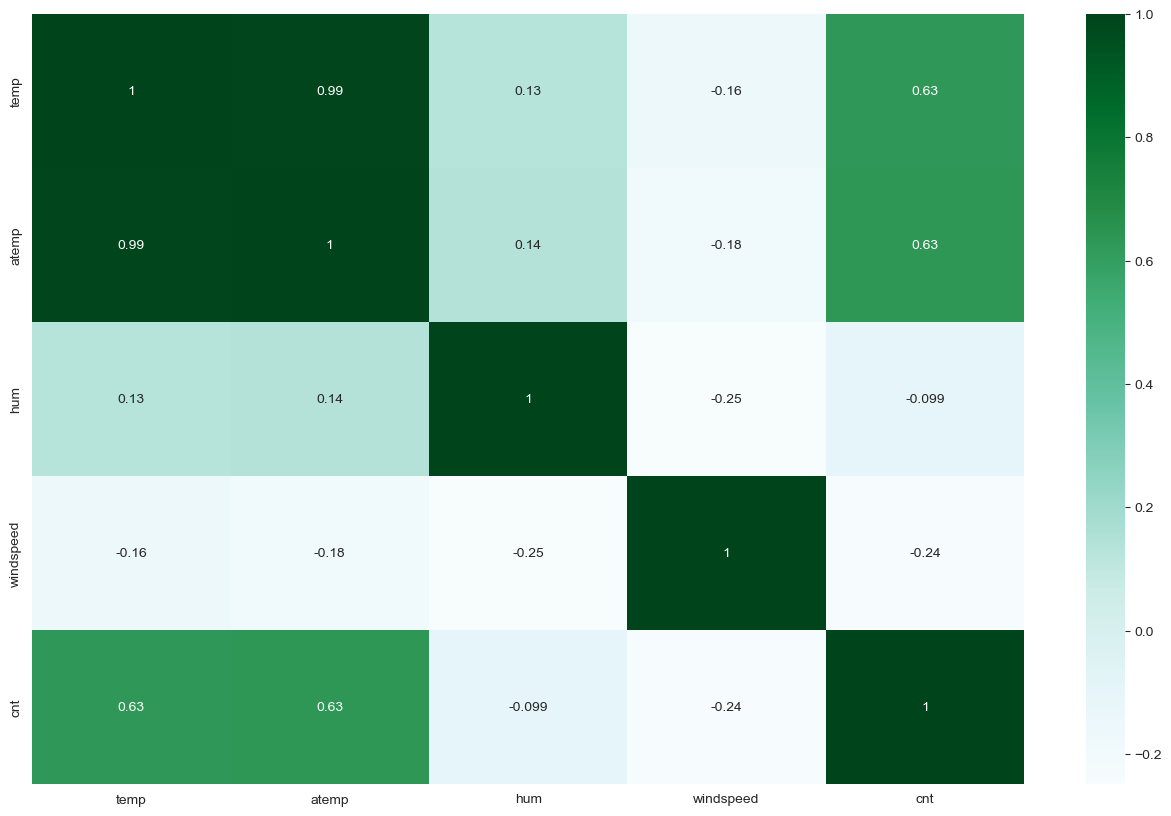

In [14]:
# from above visualisation, it appears that "temp" and "atemp" have a relationship.
# Checking continuous variables relationship with each other
plt.figure(figsize = (16, 10))
sns.heatmap(df1[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap='BuGn')
plt.show()

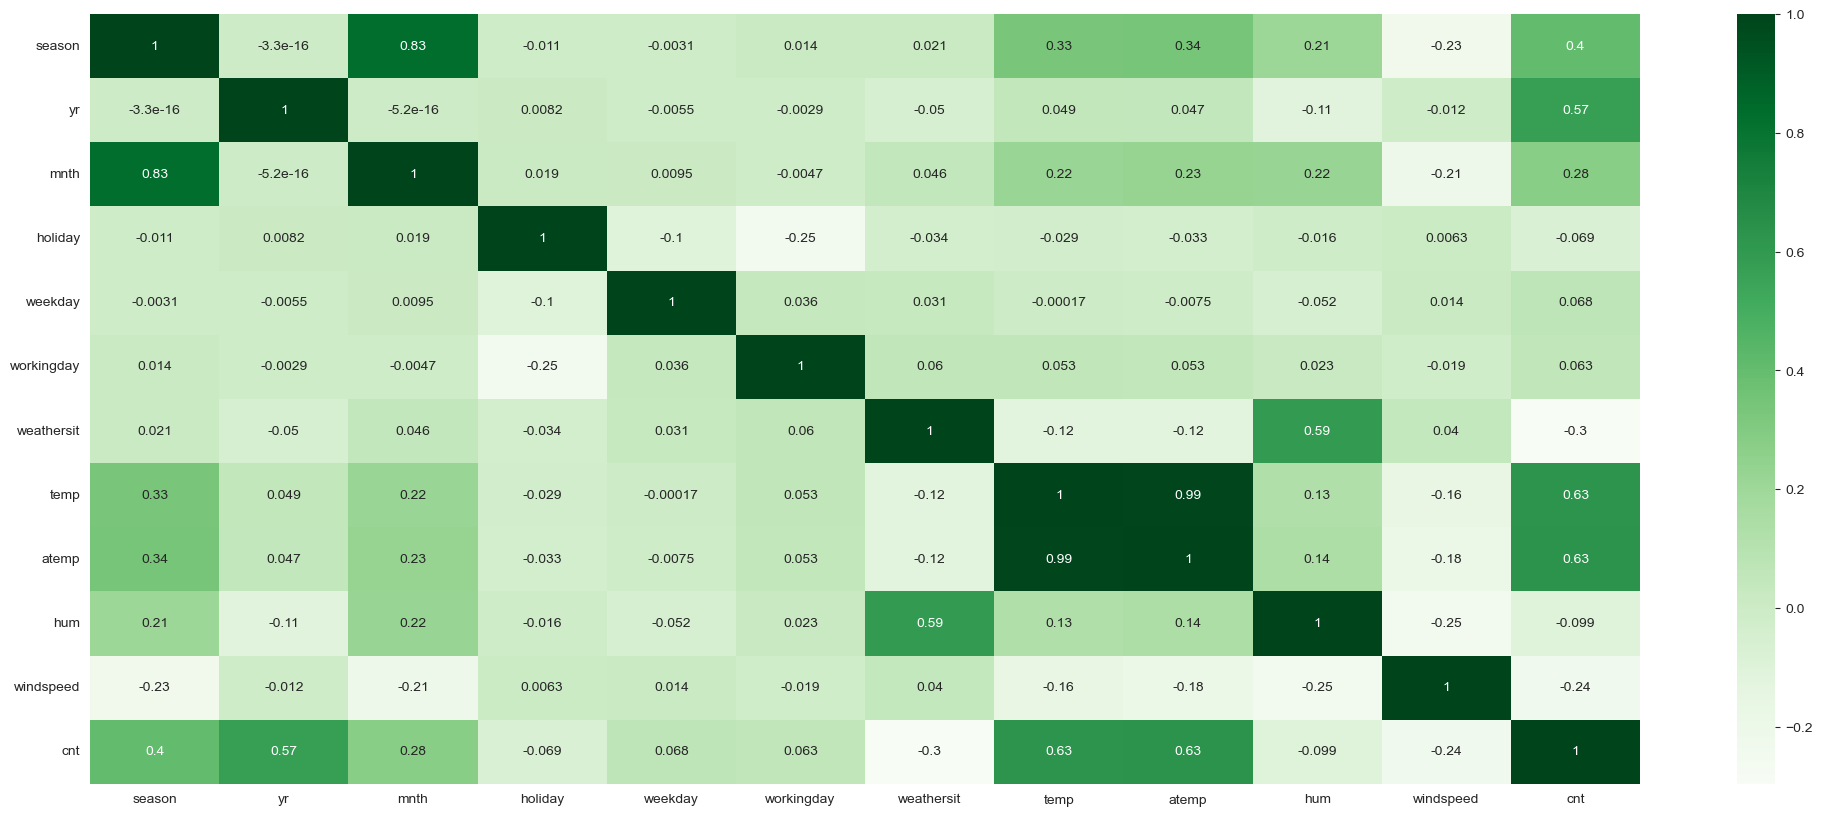

In [15]:
# Correlations for numeric variables
plt.figure(figsize=(25,10))
corr = df1.corr()
sns.heatmap(corr, cmap="Greens", annot = True)
plt.show()

###### correlation between "temp" and "atemp" is 0.99 (Almost 1)
###### Only 1 out of temp and atemp should variable can be considered for the model.
###### However, let us eliminate it based on the Variance Inflation Factor later during the model building.

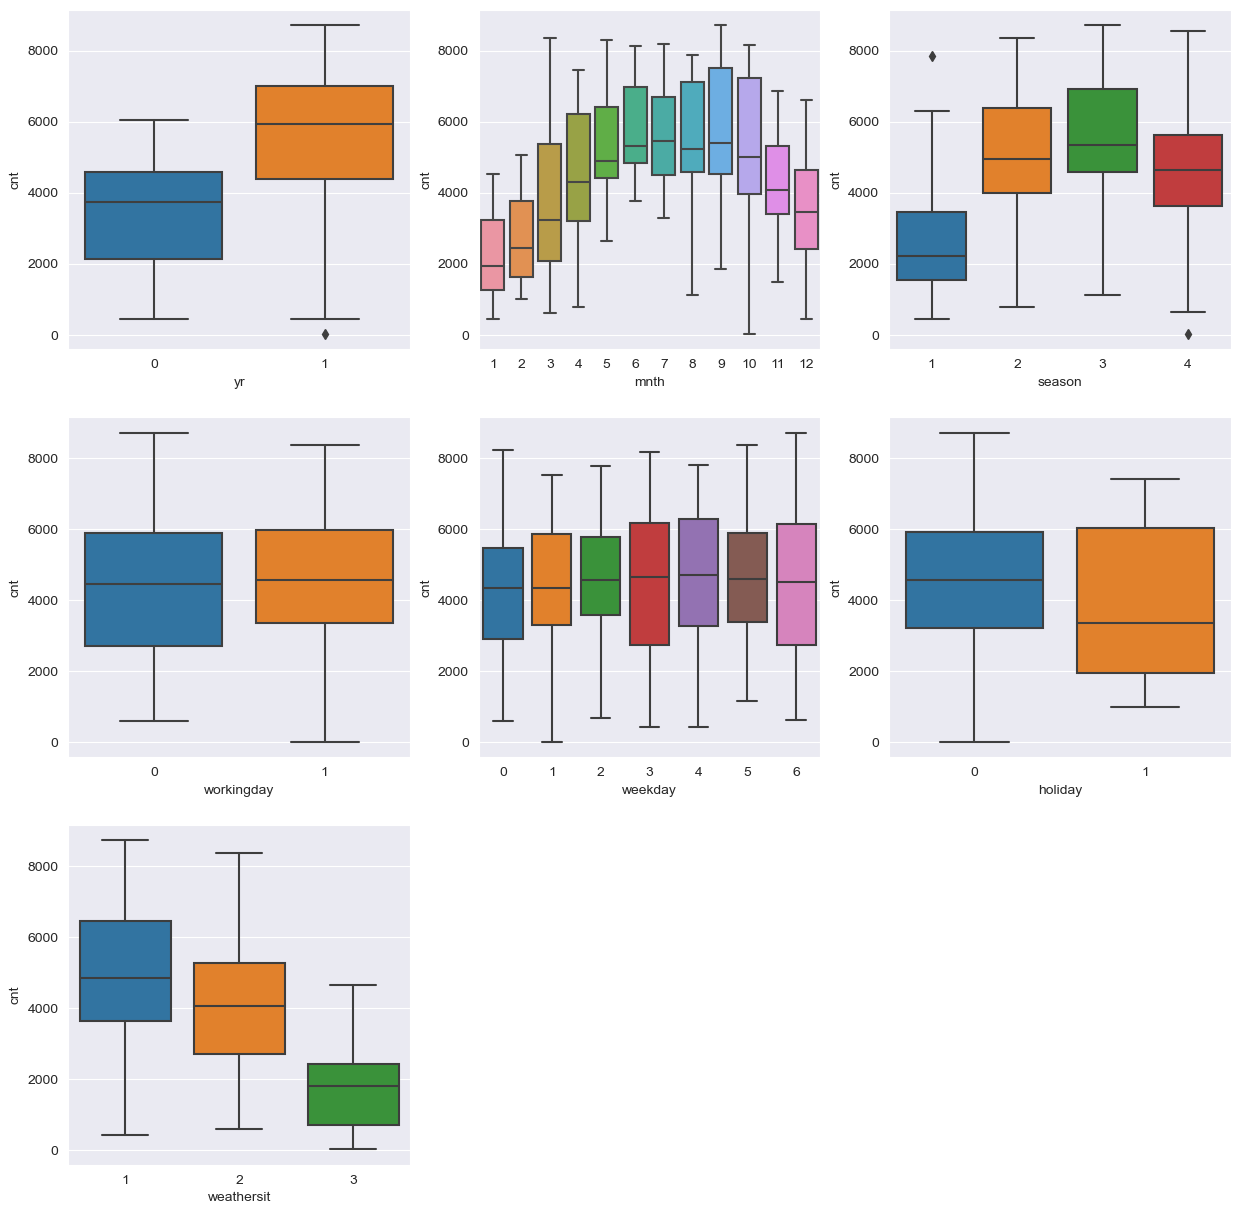

In [16]:
# "cnt" is the target variable in this case.
# Let's visualise the categorical variables using box plot to understand the data better

#plt.rcParams.update({ 'font.size': 14 })

categorical_vars = ['yr', 'mnth', 'season', 'workingday', 'weekday', 'holiday', 'weathersit']

plt.figure(figsize=(15, 15))
for idx, val in enumerate(categorical_vars):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(data=df1, x=val, y='cnt')
plt.show()

### Step 3: Visualisation - Results
* Year 2019 has a higher count of bike rentals/demands as compared to the year 2018.
* The bike rental/demand is highest during the month of June-September.
    * Since its not clear which region the bike-sharing service is operational, we would assume its US (since its a US firm).
    * June to September month is a in between Spring and Fall Season i.e. warm months in US
    * So based on the above data, we would assume that users are renting more due to the season to get more Sun.
* The hypothesis above (the Warm seasons) is backed by the data/box-plot that shows Bike Rentals/Demand were highest in Summer and Fall season.
    * Season "Fall" has the highest median i.e. highest demand
    * Season "Spring" has the lowest demand.
* The bike rentals/demand are pretty much the same throughout out the week. Weekdays or Weekends do not make a significant impact on the demand.
* The demand/rental count is between 4000 and 6000 during the week.
* The demand is more on working days than holidays (~4500 during working days vs ~3500 during holidays)
* The demand is highest when Weather is "Clear, Few clouds, Partly cloudy, Partly cloudy", followed by when weather is "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"


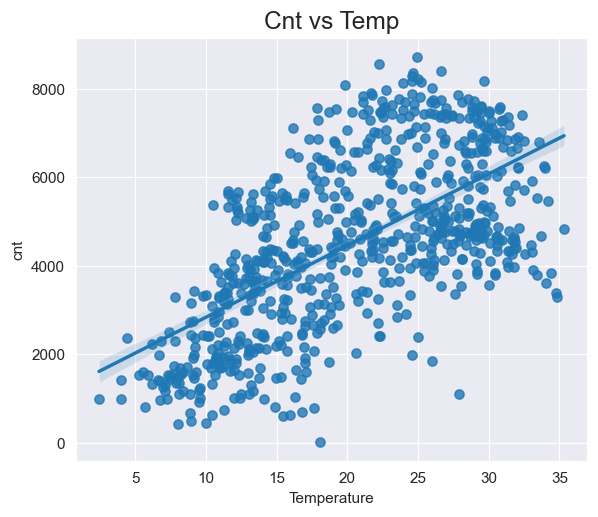

In [17]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df, y = "cnt", x = "temp")
plt.xlabel("Temperature")
plt.show()

##### Inference -
* Demand for bikes is positively correlated to temp.
* We can see a linear relation between cnt and temp.

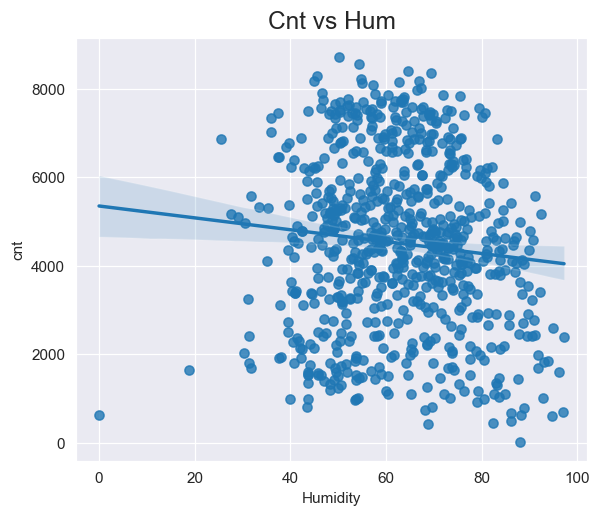

In [18]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df, y="cnt", x="hum")
plt.xlabel("Humidity")
plt.show()

##### Inference -
* Humidity values are scattered around.
* We can see cnt decreasing with increase in humidity.

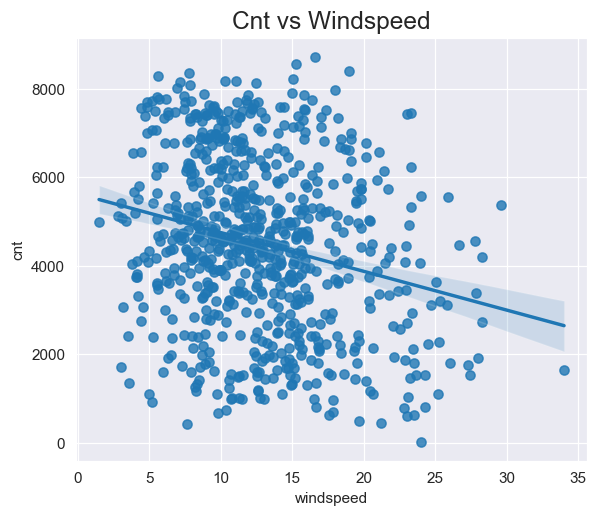

In [19]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df, y="cnt", x="windspeed")
plt.show()

##### Inference -
* Windspeed values are scattered around.
* We can see cnt decreasing with increase in windspeed.

### Step 4: Data Preparation + Dummy Variables Creation

In [20]:
# Mapping Days
df1.weekday = df1.weekday.map({
    0:"Sun",
    1:"Mon",
    2:"Tues",
    3:"Wed",
    4:"Thu",
    5:"Fri",
    6:"Sat"
})

# Mapping Months
import calendar
df1.mnth = df.mnth.apply(lambda x: calendar.month_abbr[x])

In [21]:
# Using data dictionary, converting feature values of "season" and "weathersit", "yr" columns to their categorical string values
df1.season = df1.season.map({
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
})

df1.weathersit = df1.weathersit.map({
    1: "Clear",
    2: "Misty Or Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Snow/Rain"
})

df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty Or Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty Or Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# Get the dummy variables for the features 'season', 'mnth', 'weekday', 'weathersit' and store it in a new data frame - 'dummy'
# Convert categorical variable into dummy/indicator variables.
# drop_first : Whether to get k-1 dummies out of k categorical levels by removing the first level.
dummy = df1[['season','mnth','weekday', 'weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )
# Adding the dummy variables to the original dataset
df1 = pd.concat([dummy, df1], axis = 1)

df1.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sat,0,Misty Or Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sun,0,Misty Or Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# we can now drop the original columns that we used to create the dummy variables
df1.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

df1.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow/Rain,weathersit_Misty Or Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
df1.shape

(730, 30)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season_spring               730 non-null    uint8  
 1   season_summer               730 non-null    uint8  
 2   season_winter               730 non-null    uint8  
 3   mnth_Aug                    730 non-null    uint8  
 4   mnth_Dec                    730 non-null    uint8  
 5   mnth_Feb                    730 non-null    uint8  
 6   mnth_Jan                    730 non-null    uint8  
 7   mnth_Jul                    730 non-null    uint8  
 8   mnth_Jun                    730 non-null    uint8  
 9   mnth_Mar                    730 non-null    uint8  
 10  mnth_May                    730 non-null    uint8  
 11  mnth_Nov                    730 non-null    uint8  
 12  mnth_Oct                    730 non-null    uint8  
 13  mnth_Sep                    730 non

### Step 5: Splitting data into Test and Training Set

In [26]:
from sklearn.model_selection import train_test_split

# Train Test split with 70:30 ratio
train, test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
#Inspect independent variables
train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow/Rain,weathersit_Misty Or Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [28]:
# Checking shape and size for train and test
print(train.shape)
print(test.shape)

(510, 30)
(219, 30)


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season_spring               510 non-null    uint8  
 1   season_summer               510 non-null    uint8  
 2   season_winter               510 non-null    uint8  
 3   mnth_Aug                    510 non-null    uint8  
 4   mnth_Dec                    510 non-null    uint8  
 5   mnth_Feb                    510 non-null    uint8  
 6   mnth_Jan                    510 non-null    uint8  
 7   mnth_Jul                    510 non-null    uint8  
 8   mnth_Jun                    510 non-null    uint8  
 9   mnth_Mar                    510 non-null    uint8  
 10  mnth_May                    510 non-null    uint8  
 11  mnth_Nov                    510 non-null    uint8  
 12  mnth_Oct                    510 non-null    uint8  
 13  mnth_Sep                    510 no

### Step 6: Scaling the Variables
* Variable Scaling do not impact linear models in the case of simple Linear Regression (LR). But performing multiple LR might impact the model.
* Variable Scaling just affects the coefficients and none of the other parameters like t-statistic, F-statistic, p-values, R-squared, etc.
* Since the value of the feature __cnt__ has much higher values as compared to the other features like temp etc., it is important to rescale the variables so that they have a comparable scale.
* If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
* This may be annoying at the time of model evaluation.
* Hence, is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
* There are two major ways of scaling variables:
    * Standardisation(Mean-0, Sigma-1), x = (x - mean(x)) / sd(x)
    * MinMax scaling, x = (x - min(x)) / (max(x) - min(x))

In this assignment, We will use MinMax scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()

In [31]:
# Apply minMaxScaler to all the columns except the 'dummy' variables we created above
num_vars = ['temp', 'hum', 'windspeed','temp', 'atemp']
train[num_vars] = minMaxScaler.fit_transform(train[num_vars])

In [32]:
train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow/Rain,weathersit_Misty Or Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,7534
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,4220


In [33]:
train.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow/Rain,weathersit_Misty Or Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


### Step 7: Building a Linear Regression Model

We will use the following approach :
* Use a mixed approach to build the model.
    * __RFE__ (Recursive Feature Elimination) approach for feature selection and
    * __statsmodel__ approach for building the model

In [34]:
y_train = train.pop('cnt')
X_train = train

In [35]:
y_train.shape

(510,)

In [36]:
# Feature Selection starting with 15 variables.

# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [37]:
# Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 14),
 ('weekday_Tues', False, 10),
 ('weekday_Wed', False, 13),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Misty Or Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [38]:
import statsmodels.api as sm
# Manual elimination
# Function to build a model using statsmodel api - Input is columns to be selected for model as a parameter

def build_model(cols):
    # Creating X_test dataframe with RFE selected variables
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Checking VIF for Multicollinearity

VIF(Variance Inflation Factor) provides a basic quantitative idea about correlation between the feature variables.
It is an important parameter to test our linear model. The formula for calculating __VIF__ is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_calc

def getVIF(cols):
    temp = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = temp.columns
    vif['VIF'] = [vif_calc(temp.values, i) for i in range(temp.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [40]:
# Print Columns selected by RFE. We will start with these columns for manual elimination
cols = X_train.columns[rfe.support_]
cols

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow/Rain',
       'weathersit_Misty Or Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [41]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Thu',
       'weekday_Tues', 'weekday_Wed', 'atemp'],
      dtype='object')

#### 7.1 Build Model 1 - Start with all variables selected by RFE

In [42]:
# Running the linear model
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.13e-191
Time:                        19:28:41   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [43]:
# Let's check the VIF Score !!
getVIF(cols)

                      Features    VIF
11                  workingday  50.69
5                  weekday_Sat  12.20
6                  weekday_Sun  11.79
0                season_spring   5.02
12                        temp   3.62
2                season_winter   3.49
10                     holiday   2.91
1                season_summer   2.61
13                         hum   1.91
8   weathersit_Misty Or Cloudy   1.57
3                     mnth_Jul   1.49
4                     mnth_Sep   1.30
7   weathersit_Light Snow/Rain   1.25
14                   windspeed   1.20
9                           yr   1.03


##### Based on VIF value, following is a possibility
* High p-value, High VIF
* High-Low
* High p-value, Low VIF --> Remove these first
* Low p-value, High VIF --> Remove all these after the ones above
* Low p-value, Low VIF

#### 7.2 Build Model 2 - Dropping the variable mnth_jan as it has negative coefficient(-323.3970) and high p-value (0.032)

In [44]:
cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep',
        'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow/Rain',
        'weathersit_Misty Or Cloudy', 'yr', 'holiday', 'workingday', 'temp',
        'hum', 'windspeed']

In [45]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.81e-192
Time:                        19:28:41   Log-Likelihood:                -4109.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     496   BIC:                             8306.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [46]:
getVIF(cols)

                      Features    VIF
10                  workingday  30.97
4                  weekday_Sat   7.66
5                  weekday_Sun   7.58
9                      holiday   2.11
12                         hum   1.87
7   weathersit_Misty Or Cloudy   1.57
11                        temp   1.54
2                     mnth_Aug   1.44
0                season_summer   1.37
1                season_winter   1.32
6   weathersit_Light Snow/Rain   1.24
3                     mnth_Sep   1.21
13                   windspeed   1.18
8                           yr   1.03


#### 7.3 Build Model 3 - Dropping the variable holiday as it has negative coefficient(-239.2140) and high p-value (0.186)

In [47]:
cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep',
        'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow/Rain',
        'weathersit_Misty Or Cloudy', 'yr', 'workingday', 'temp',
        'hum', 'windspeed']

In [48]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.81e-192
Time:                        19:28:41   Log-Likelihood:                -4109.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     496   BIC:                             8306.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
getVIF(cols)

                      Features    VIF
11                         hum  25.25
9                   workingday  15.43
10                        temp  10.05
12                   windspeed   4.35
4                  weekday_Sat   4.20
5                  weekday_Sun   4.15
7   weathersit_Misty Or Cloudy   2.21
8                           yr   2.05
0                season_summer   1.82
1                season_winter   1.75
2                     mnth_Aug   1.59
3                     mnth_Sep   1.32
6   weathersit_Light Snow/Rain   1.20


##### Now since we have removed all variables with high p-value, lets target the variable with highest VIF and low p-value i.e. "hum"

#### 7.4 Build Model 4 - Dropping the variable "hum" as it has highest VIF of value 25.25

In [50]:
cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep',
        'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow/Rain',
        'weathersit_Misty Or Cloudy', 'yr', 'workingday', 'temp', 'windspeed']

In [51]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.89e-189
Time:                        19:28:41   Log-Likelihood:                -4119.5
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     497   BIC:                             8320.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
getVIF(cols)

                      Features   VIF
9                   workingday  8.91
10                        temp  8.61
11                   windspeed  4.35
4                  weekday_Sat  2.79
5                  weekday_Sun  2.64
8                           yr  2.05
0                season_summer  1.81
1                season_winter  1.61
2                     mnth_Aug  1.59
7   weathersit_Misty Or Cloudy  1.58
3                     mnth_Sep  1.31
6   weathersit_Light Snow/Rain  1.08


#### 7.5 Build Model 5 - Dropping the variable "workingday" as it has highest VIF of value 8.91

In [53]:
cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep',
        'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow/Rain',
        'weathersit_Misty Or Cloudy', 'yr', 'temp', 'windspeed']

In [54]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          5.77e-187
Time:                        19:28:41   Log-Likelihood:                -4127.5
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     498   BIC:                             8330.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [55]:
getVIF(cols)

                      Features   VIF
9                         temp  5.12
10                   windspeed  3.18
8                           yr  2.00
0                season_summer  1.81
2                     mnth_Aug  1.58
1                season_winter  1.50
7   weathersit_Misty Or Cloudy  1.49
3                     mnth_Sep  1.31
4                  weekday_Sat  1.21
5                  weekday_Sun  1.19
6   weathersit_Light Snow/Rain  1.08


#### 7.6 Build Model 6 - Dropping the variable "weekday_Sat" as it has high p-value (0.286) and low VIF (1.21)

In [56]:
cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'weekday_Sun', 'weathersit_Light Snow/Rain',
        'weathersit_Misty Or Cloudy', 'yr', 'temp', 'windspeed']

In [57]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          7.85e-188
Time:                        19:28:41   Log-Likelihood:                -4128.3
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     499   BIC:                             8325.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [58]:
getVIF(cols)

                     Features   VIF
8                        temp  5.09
9                   windspeed  3.10
7                          yr  2.00
0               season_summer  1.81
2                    mnth_Aug  1.58
1               season_winter  1.49
6  weathersit_Misty Or Cloudy  1.48
3                    mnth_Sep  1.31
4                 weekday_Sun  1.16
5  weathersit_Light Snow/Rain  1.08


#### 7.7 Build Model 7 - Dropping the variable "temp" as it has high VIF (5.09)

In [59]:
cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'weekday_Sun', 'weathersit_Light Snow/Rain',
        'weathersit_Misty Or Cloudy', 'yr', 'windspeed']

In [60]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          5.58e-107
Time:                        19:28:41   Log-Likelihood:                -4322.0
No. Observations:                 510   AIC:                             8664.
Df Residuals:                     500   BIC:                             8706.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [61]:
getVIF(cols)

                     Features   VIF
8                   windspeed  2.46
7                          yr  1.82
0               season_summer  1.52
6  weathersit_Misty Or Cloudy  1.48
1               season_winter  1.41
2                    mnth_Aug  1.16
4                 weekday_Sun  1.15
3                    mnth_Sep  1.10
5  weathersit_Light Snow/Rain  1.08


##### The model accuracy dropped (R-square and adj. R-square) by almost 20% !!
##### Adding back temp and removing "windspeed" which had the 2nd highest VIF of 3.10 in model 6!!

#### 7.8 Build Model 8 - Adding back temp and removing "windspeed"

In [62]:
cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'temp', 'weekday_Sun', 'weathersit_Light Snow/Rain',
        'weathersit_Misty Or Cloudy', 'yr']

In [63]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          2.01e-181
Time:                        19:28:41   Log-Likelihood:                -4146.3
No. Observations:                 510   AIC:                             8313.
Df Residuals:                     500   BIC:                             8355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [64]:
getVIF(cols)

                     Features   VIF
4                        temp  4.04
8                          yr  1.94
0               season_summer  1.78
2                    mnth_Aug  1.56
1               season_winter  1.47
7  weathersit_Misty Or Cloudy  1.44
3                    mnth_Sep  1.29
5                 weekday_Sun  1.16
6  weathersit_Light Snow/Rain  1.06


### Step 7: Model Build Results !

1. the VIF values are almost accepted.
2. p-value for all features is almost 0.0
3. R-Square and Adj. R-Square are comparable i.e. 0.823 vs 0.819 respectively
4. We Will use Model No. 8 as the final model since its meeting all the important stats as high (R-Square, Adj. R-Square & F-Statistics). This model also has variables with low (almost 0) p-values and no multi-collinearity (high VIF)
5. Since the difference between R-Square and Adj. R-Square is very less, i.e. 0.004, it means that there are no additional params that we can remove from the model (We saw the score taking a considerable dip in Model 7 if we tried removing anything additional)

In [65]:
# lets build the model with all the finalised variables
def build_final_model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'temp', 'weekday_Sun', 'weathersit_Light Snow/Rain', 'weathersit_Misty Or Cloudy', 'yr']

lr = build_final_model(X_train[cols], y_train)
print(lr.intercept_, lr.coef_)

643.7261218870722 [  838.78183852  1272.40184207   499.9032315   1026.75246593
  4729.83873242  -390.34681953 -2587.91863683  -703.36250921
  2012.07893851]


### Step 8: Model Evaluation & Residual Analysis of the train data

In [66]:
y_train_pred = lr.predict(X_train[cols])
# lets check r2
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8225684888827496

##### The above calculate R-Square score is same as the R-Square score predicted by the final model

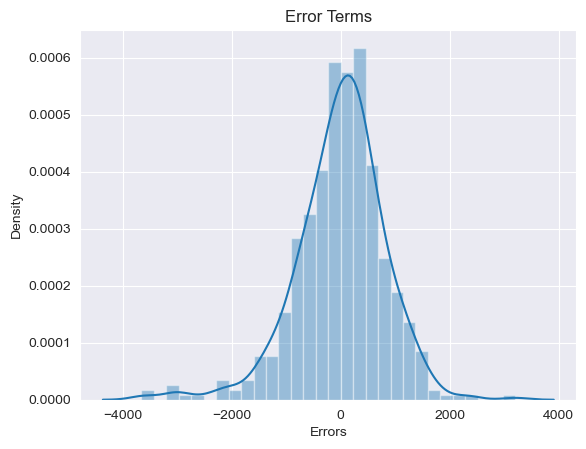

In [67]:
#Plot a histogram of the error terms
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

##### Errors are normally distributed here with mean 0. So everything seems to be fine

##### Cross-verifying the above conclusion using a qq-plot as well:

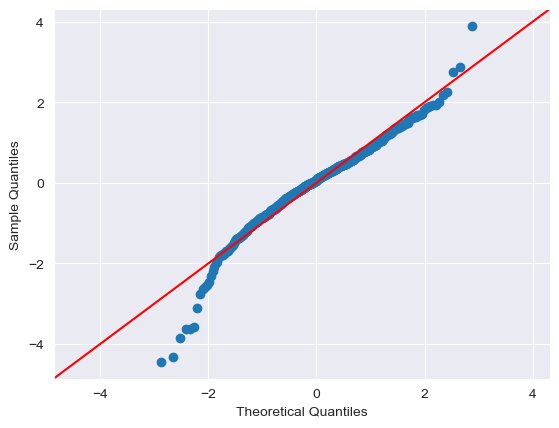

In [68]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

##### Conclusion of qq plot - Most of the data points lie on the straight line , which indicates that the error terms are normally distributed

##### Linearity Check

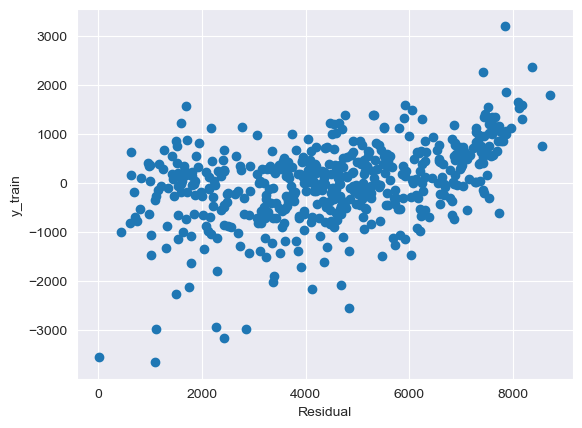

In [69]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Step 9: Predict values for test data set

In [70]:
# Scale variables in X_test. num_vars same as original and in the same order
num_vars = ['temp', 'hum', 'windspeed','temp', 'atemp']

#Test data to be transformed only, no fitting
test[num_vars] = minMaxScaler.transform(test[num_vars])

In [71]:
# Columns from our final model
cols = ['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'temp', 'weekday_Sun', 'weathersit_Light Snow/Rain', 'weathersit_Misty Or Cloudy', 'yr']

# Predict the values for test data
y_test_pred = lr.predict(test[cols])

In [72]:
y_test = test.pop('cnt')
X_test = test

# Find out the R squared value between test and predicted test data sets.
r2_score(y_test, y_test_pred)

0.797222435103214

### Step 9: Conclusion
* R-Squared value for predictions on test data (0.800) is almost same as R-Squared value of train data(0.823).
* This is a good R-squared value. We can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

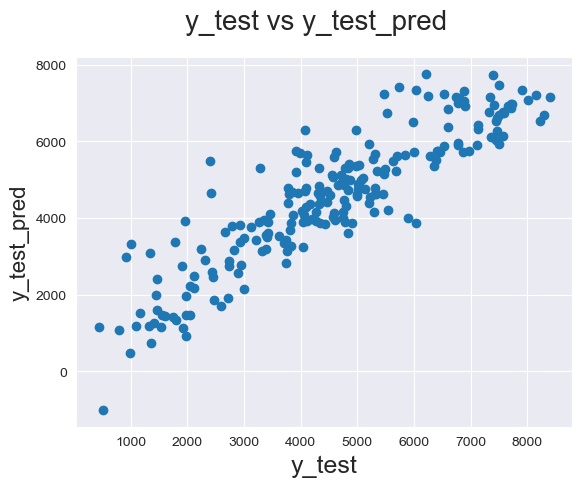

In [73]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

##### In above diagram, Variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes

### Interpretation of results from the model training and then testing !!!

1. The model can explain more than 80% of bike demand
2. The top 3-4 variables contributing to the demand are -
    1. Temperature - Increase in temp, increases the demand of bike rentals.
    2. Year - 2019 fared lot better than 2018 i.e. the company should see better rentals/demand once we are out of pandemic
    3. Summer Season - There is more demand during summer season
    4. Particularly month of August - The season of Spring, in which Aug falls, has a better demand than other months.
3. The company should consider the following -
    1. Company should focus on expanding business during September.
    2. There would be fewer bookings during Light Snow or Light Rain. The company can probably use this time to may be launch new product or feature to save from rain/snow to capture market or to service/upgrade the bikes without having bigger business impact
    3. Company should focus on expanding business during Spring i.e. between the months of June - Aug.